<a href="https://colab.research.google.com/github/Claudia-Ferro/Data-Science/blob/main/C%C3%B3pia_de_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1")

## Análise dos Dados


**Dicionário das variáveis**

* id - número de identificação do imóvel
* name - nome da propriedade 
* host_id - número de identificação do proprietário
* host_name - nome do proprietário
* neighbourhood_group - sem dados
* neighbourhood - nome do bairro
* latitude - coordenada geográfica da propriedade
* longitude - coordenada geográfica da propriedade
* room_type - tipo de quarto
* price - preço diário da moeda local
* minimum_nights - quantidade mínima de pernoites reservadas
* number_of_reviews - número de avaliações
* last_review - data da última avaliação
* reviews_per_month - quantidade de avaliações por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo proprietário
* availability_365 - número de dias de disponibilidade por ano



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,190,5,260,2021-02-08,1.98,1,343
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,311,3,85,2018-02-14,0.66,1,73
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,267,2,181,2020-03-15,1.98,1,272
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,359,2021-04-21,2.79,1,139
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.98102,-43.19172,Entire home/apt,493,3,18,2016-02-09,0.18,2,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entrada:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entrada:	 26467
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.371179
last_review                       0.371179
host_name                         0.032380
name                              0.001096
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

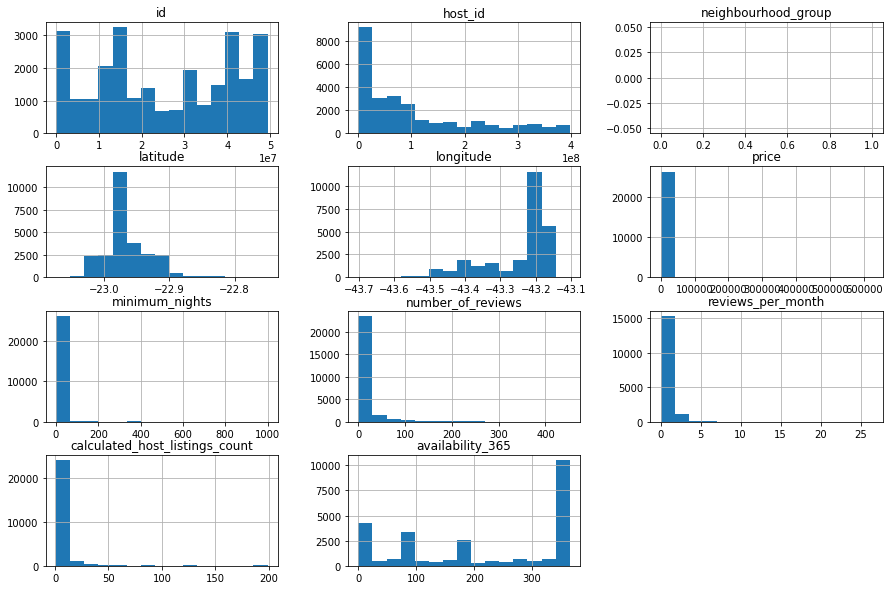

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


In [ ]:
#ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26467.000000,26467.00000,26467.000000,16643.000000,26467.000000,26467.000000
mean,734.860052,4.80096,12.417501,0.580291,6.919220,214.943099
std,5274.600381,19.21445,30.313117,0.823784,21.310525,143.136520
min,0.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.00000,0.000000,0.080000,1.000000,88.000000
50%,260.000000,2.00000,2.000000,0.260000,1.000000,223.000000
75%,529.000000,4.00000,9.000000,0.770000,3.000000,364.000000
max,623592.000000,1000.00000,452.000000,26.430000,199.000000,365.000000


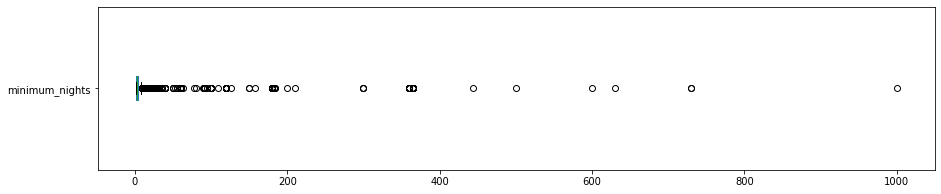

minimum_nights: valores acima de 30:
216 entradas
0.8161%


In [ ]:
#gerar gráfico boxplot para minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

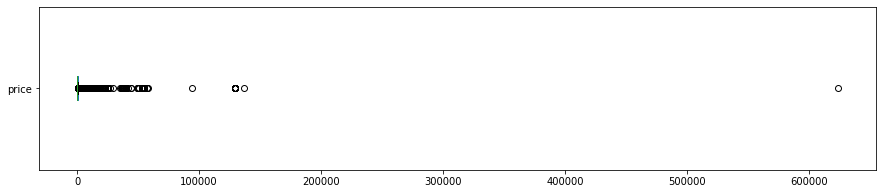

In [ ]:
#preço
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()



price: valores acima de 1500
1773 entradas
6.6989%


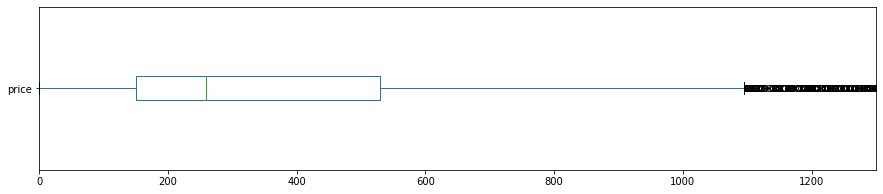

In [ ]:
#ver a quantidade de valores acima de 1500 reais
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))
df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));
              

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df.price.mean()

734.8600521404013

### **Q4. Qual a correlação existente entre as variáveis**

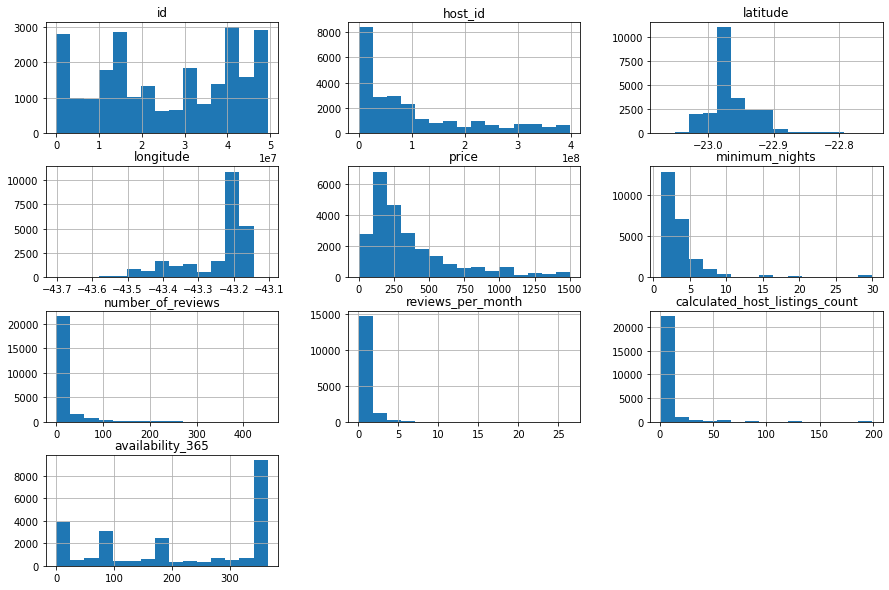

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover 'neighbourhood_group' , pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histrograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));







In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.130315,-0.161856,-0.175125,0.067542,0.078650
minimum_nights,0.130315,1.000000,-0.060445,-0.097327,-0.044090,-0.019873
number_of_reviews,-0.161856,-0.060445,1.000000,0.642706,-0.047373,-0.066912
reviews_per_month,-0.175125,-0.097327,0.642706,1.000000,-0.013627,-0.130992
calculated_host_listings_count,0.067542,-0.044090,-0.047373,-0.013627,1.000000,0.025664
availability_365,0.078650,-0.019873,-0.066912,-0.130992,0.025664,1.000000


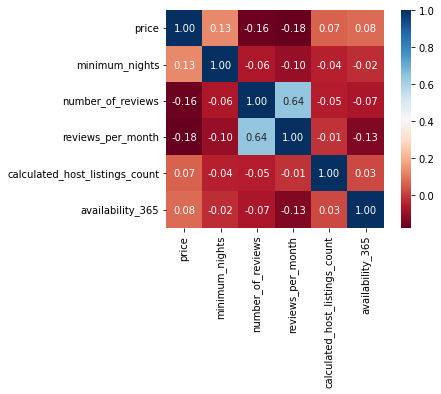

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17368
Private room        6447
Shared room          593
Hotel room            90
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.708956
Private room       0.263164
Shared room        0.024206
Hotel room         0.003674
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Caju             1325.000000
Cavalcanti        925.000000
Realengo          888.714286
Vaz Lobo          830.000000
Anchieta          800.000000
Manguinhos        573.333333
Paciência         567.285714
Rocha Miranda     564.500000
Sepetiba          562.000000
Grumari           536.666667
Name: price, dtype: float64

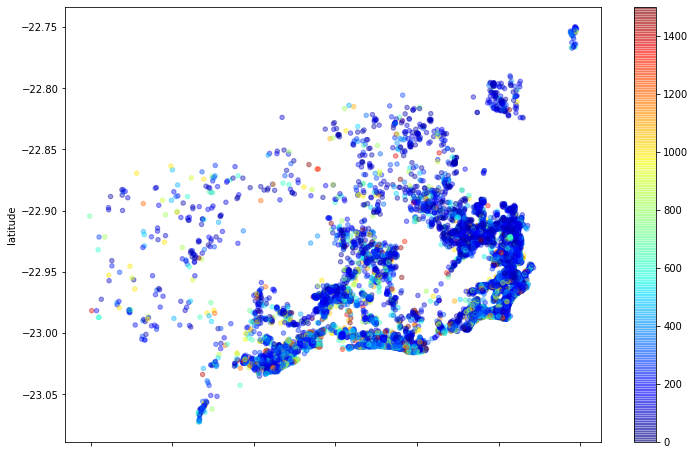

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], cmap=plt.get_cmap('jet'), figsize=(12,8));

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).room_type.value_counts().sort_values(ascending=False)[:10]

neighbourhood             room_type      
Copacabana                Entire home/apt    5786
Ipanema                   Entire home/apt    1954
Barra da Tijuca           Entire home/apt    1751
Copacabana                Private room       1340
Leblon                    Entire home/apt     916
Jacarepaguá               Entire home/apt     867
Recreio dos Bandeirantes  Entire home/apt     785
Botafogo                  Entire home/apt     734
Barra da Tijuca           Private room        569
Centro                    Entire home/apt     514
Name: room_type, dtype: int64

In [ ]:
df_clean.groupby(['neighbourhood']).room_type.value_counts().sort_values()[:10]

neighbourhood      room_type      
Cordovil           Entire home/apt    1
Piedade            Shared room        1
Pitangueiras       Entire home/apt    1
Encantado          Shared room        1
Deodoro            Entire home/apt    1
Praia da Bandeira  Private room       1
Praça Seca         Shared room        1
Quintino Bocaiúva  Entire home/apt    1
Cosme Velho        Shared room        1
Quintino Bocaiúva  Shared room        1
Name: room_type, dtype: int64

In [ ]:
df_clean.groupby(['neighbourhood']).room_type.value_counts()[:10]

neighbourhood      room_type      
Abolição           Entire home/apt     4
                   Shared room         1
Acari              Entire home/apt     1
Alto da Boa Vista  Entire home/apt    13
                   Private room       11
                   Shared room         1
Anchieta           Shared room         1
Andaraí            Private room       26
                   Entire home/apt    18
                   Shared room         4
Name: room_type, dtype: int64

In [ ]:
df.neighbourhood.value_counts()[:10]

Copacabana                  7603
Barra da Tijuca             2726
Ipanema                     2520
Jacarepaguá                 1341
Recreio dos Bandeirantes    1193
Botafogo                    1178
Leblon                      1174
Santa Teresa                 955
Centro                       727
Flamengo                     641
Name: neighbourhood, dtype: int64

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()


4.800959685646276

## Conclusões
